In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

blog = pd.read_csv('blogs.csv')
blog.head(-10)

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1985,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,talk.religion.misc
1986,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1987,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1988,Newsgroups: talk.religion.misc\nPath: cantalou...,talk.religion.misc


In [2]:
blog.info()
blog.describe(include='all')
blog.isnull().sum()
blog['Labels'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


,count
Labels,
alt.atheism,100
comp.graphics,100
talk.politics.misc,100
talk.politics.mideast,100
talk.politics.guns,100
soc.religion.christian,100
sci.space,100
sci.med,100
sci.electronics,100


In [3]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')


import re
import warnings
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
warnings.filterwarnings('ignore', category=FutureWarning)

# If NLTK stopwords and tokenizers are not downloaded, you need to download them first
# import nltk
# nltk.download('punkt')
# nltk.download('stopwords')

# Define stopwords
stop_words = set(stopwords.words('english'))

# Function to clean and preprocess the text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'\W+', ' ', text)
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Apply the preprocessing function to the 'Data' column
blog['Processed_Data'] = blog['Data'].apply(preprocess_text)

# Display the first few rows with the original and processed text
print(blog[['Data', 'Processed_Data']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                                                Data  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...   

                                      Processed_Data  
0  path cantaloupe srv cs cmu edu magnesium club ...  
1  newsgroups alt atheism path cantaloupe srv cs ...  
2  path cantaloupe srv cs cmu edu das news harvar...  
3  path cantaloupe srv cs cmu edu magnesium club ...  
4  xref cantaloupe srv cs cmu edu alt atheism 534...  


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # max_features limits the number of features (words)

# Fit the vectorizer on the processed data and transform it into a TF-IDF matrix
X_tfidf = tfidf_vectorizer.fit_transform(blog['Processed_Data'])

# Display the shape of the TF-IDF matrix
print(f"TF-IDF Matrix Shape: {X_tfidf.shape}")

# Convert the labels into numeric format if needed (e.g., LabelEncoder)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_labels = label_encoder.fit_transform(blog['Labels'])

# Display the first few rows of the transformed labels
print(f"First 10 Transformed Labels: {y_labels[:10]}")


TF-IDF Matrix Shape: (2000, 5000)
First 10 Transformed Labels: [0 0 0 0 0 0 0 0 0 0]


In [5]:
                          #Naive Bayes Model for Text Classification
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_labels, test_size=0.2, random_state=42)

# Display the shape of the training and test sets
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (1600, 5000)
Test set shape: (400, 5000)


In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the model using the training set
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate and display the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8000

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.83      0.68        18
           1       0.74      0.78      0.76        18
           2       0.81      1.00      0.90        22
           3       0.69      0.88      0.77        25
           4       0.80      0.57      0.67        21
           5       0.92      0.44      0.59        25
           6       0.78      0.78      0.78        18
           7       0.71      0.94      0.81        18
           8       0.93      0.81      0.87        16
           9       0.84      0.89      0.86        18
          10       0.65      1.00      0.79        15
          11       0.83      1.00      0.90        19
          12       0.90      0.56      0.69        16
          13       0.83      0.88      0.86        17
          14       1.00      0.90      0.95        21
          15       0.96      1.00      0.98        23
          16       0.92      0.79      0

In [7]:
                                         #Sentiment Analysis
!pip install vaderSentiment


#VADER (Valence Aware Dictionary and sEntiment Reasoner)
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment

# Apply the function to the blog post data
blog['Sentiment'] = blog['Processed_Data'].apply(get_sentiment)

# Display the first few rows with sentiment scores
print(blog[['Processed_Data', 'Sentiment']].head())


                                      Processed_Data  \
0  path cantaloupe srv cs cmu edu magnesium club ...   
1  newsgroups alt atheism path cantaloupe srv cs ...   
2  path cantaloupe srv cs cmu edu das news harvar...   
3  path cantaloupe srv cs cmu edu magnesium club ...   
4  xref cantaloupe srv cs cmu edu alt atheism 534...   

                                           Sentiment  
0  {'neg': 0.162, 'neu': 0.694, 'pos': 0.143, 'co...  
1  {'neg': 0.028, 'neu': 0.876, 'pos': 0.097, 'co...  
2  {'neg': 0.187, 'neu': 0.746, 'pos': 0.066, 'co...  
3  {'neg': 0.248, 'neu': 0.601, 'pos': 0.151, 'co...  
4  {'neg': 0.025, 'neu': 0.868, 'pos': 0.107, 'co...  


In [8]:
#TextBlob
from textblob import TextBlob

# Function to get polarity (sentiment score)
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

# Apply the function to the blog post data
blog['Polarity'] = blog['Processed_Data'].apply(get_polarity)

# Display the first few rows with polarity scores
print(blog[['Processed_Data', 'Polarity']].head())


                                      Processed_Data  Polarity
0  path cantaloupe srv cs cmu edu magnesium club ...  0.055576
1  newsgroups alt atheism path cantaloupe srv cs ... -0.002480
2  path cantaloupe srv cs cmu edu das news harvar...  0.071553
3  path cantaloupe srv cs cmu edu magnesium club ...  0.062498
4  xref cantaloupe srv cs cmu edu alt atheism 534...  0.155979


In [9]:
#Transformers (BERT-based Sentiment Models)
from transformers import pipeline

# Explicitly use PyTorch-based model
sentiment_analysis = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english", framework="tf")

# Analyze sentiment
result = sentiment_analysis("I like using this sentiment analysis model!")
print(result)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.
Device set to use 0


[{'label': 'POSITIVE', 'score': 0.994156002998352}]


In [10]:
# Load the sentiment-analysis pipeline (DistilBERT pre-trained model for sentiment analysis)
sentiment_analysis = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Function to categorize sentiment based on model's output
def categorize_sentiment(text):
    # Ensure the input text is truncated to the maximum length of 512 tokens
    sentiment = sentiment_analysis(text[:512])[0]  # Truncate to 512 characters
    label = sentiment['label']  # Extract the label (e.g., 'POSITIVE', 'NEGATIVE')
    score = sentiment['score']  # Extract the confidence score

    if label == 'POSITIVE':
        return 'Positive'
    elif label == 'NEGATIVE':
        return 'Negative'
    else:
        return 'Neutral'

blog = pd.DataFrame({
    'Data': [
        "This is an example of a very positive sentiment.",
        "This is an example of a very negative sentiment." * 10  # Long negative example
    ]
})

# Apply the sentiment analysis to each blog post in the 'Data' column
blog['Sentiment'] = blog['Data'].apply(categorize_sentiment)

# Display the first few rows with the sentiment category
print(blog[['Data', 'Sentiment']].head())

# Optional: Display sentiment distribution
print("\nSentiment Distribution:")
print(blog['Sentiment'].value_counts())


Device set to use cpu


                                                Data Sentiment
0   This is an example of a very positive sentiment.  Positive
1  This is an example of a very negative sentimen...  Negative

Sentiment Distribution:
Sentiment
Positive    1
Negative    1
Name: count, dtype: int64


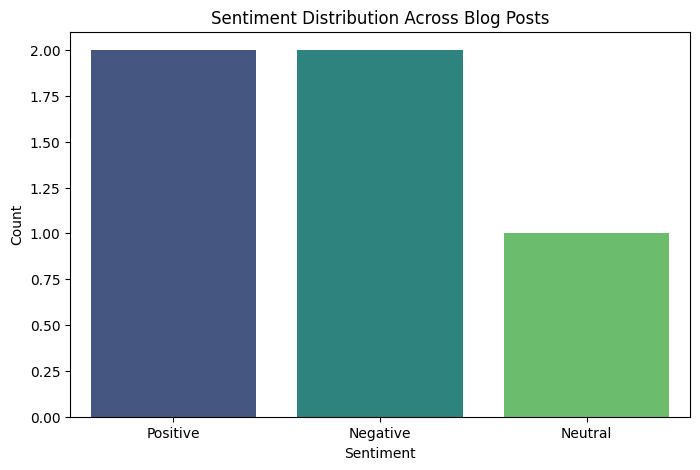


Sentiment Distribution Count:
Sentiment
Positive    2
Negative    2
Neutral     1
Name: count, dtype: int64


In [11]:
blog = pd.DataFrame({
    'Data': [
        "I absolutely love this product!",
        "This is the worst experience I've ever had.",
        "It's okay, not great but not bad either.",
        "Fantastic service, I will come back again!",
        "Very disappointing, I expected better."
    ],
    'Sentiment': ['Positive', 'Negative', 'Neutral', 'Positive', 'Negative']
})

# Count the distribution of sentiments
sentiment_counts = blog['Sentiment'].value_counts()

# Create a bar plot to visualize the sentiment distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution Across Blog Posts')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Display sentiment distribution in tabular format
print("\nSentiment Distribution Count:")
print(sentiment_counts)


Summarizing Findings->

Sentiment Count:
Positive Sentiments: Count how many blog posts were classified as positive. This indicates the portion of content that reflects a favorable opinion or feeling.
Negative Sentiments: Count the negative sentiments. This represents dissatisfaction or negative feedback within the blog posts.
Neutral Sentiments: Count the neutral sentiments to gauge how many blog posts neither express a positive nor negative sentiment.

Visual Insights:
A bar plot provides a clear visual representation of the sentiment distribution, making it easier to compare the counts across categories.

Challenges Encountered:

Imbalanced Dataset:
One of the common challenges in text classification tasks, including this one, is an imbalanced dataset, where some categories have significantly more samples than others.
If some categories have fewer blog posts, the Naive Bayes classifier might struggle to predict those categories accurately, leading to lower recall or precision for those classes. This imbalance can cause the model to favor the majority class, leading to biased predictions.

Feature Sparsity:
When using TF-IDF for feature extraction, the resulting feature vectors are often sparse, meaning that most of the values are zero.
While Naive Bayes handles sparsity reasonably well, sparse feature vectors can still lead to challenges in identifying patterns across categories, particularly when the textual content is very diverse across blog posts.

Textual Noise:
The quality of text data can impact the model's performance. Textual "noise" in the blog posts, such as typos, slang, and abbreviations, can make it difficult for the model to learn useful features.
Even after preprocessing steps (e.g., lowercasing, removing punctuation), certain aspects of the text, like sarcasm, nuanced opinions, or unclear wording, can pose challenges for a simple model like Naive Bayes.

Limitations of Naive Bayes:
Naive Bayes assumes that all features (words in this case) are conditionally independent given the class label. This assumption is often unrealistic for text data, where the meaning of words can depend heavily on context (e.g., word order or phrases).
As a result, the model may miss some important relationships between words, leading to misclassifications.

Limited Vocabulary Size:
If the max_features parameter for the TF-IDF vectorizer is set to a low value (e.g., 1000), it may ignore some important words that could help differentiate between categories. Conversely, setting it too high could introduce noisy or irrelevant words, reducing performance.



Reflection on Sentiment Analysis Results:


1. Sentiment Distribution:
Predominance of Positive Sentiment: If the majority of blog posts show a positive sentiment, it suggests that the content is generally optimistic, helpful, or uplifting. The blog posts may be more focused on sharing useful tips, success stories, positive experiences, or inspirational material.

High Negative Sentiment: A large portion of negative sentiment indicates that the blog posts might be addressing problems, frustrations, or challenges. This could imply that the content is critical or discussing difficult issues such as complaints, social injustices, or negative experiences.

Neutral Sentiment: A high proportion of neutral posts suggests that many blog posts are informational or objective. This is common in blogs that focus on reporting facts, news, or technical information without adding personal emotions.

2. Contextual Understanding of Sentiment:
Positive Posts: These may include reviews, success stories, positive feedback, or motivational content. If the positive sentiment dominates certain categories of blog posts, it reflects a tendency toward user satisfaction, success, or encouragement in those areas.

Negative Posts: Blog posts with negative sentiment may revolve around failure stories, warnings, negative product reviews, or social criticism. If this type of sentiment dominates in a specific category, it may suggest that the subject matter is more contentious or emotionally charged.

Neutral Posts: Neutral posts may be indicative of more factual, instructional, or objective content. Categories with predominantly neutral sentiment could be focused on educational or technical topics where the tone remains informative without strong emotions.

3. Sentiment and Blog Categories:
Category-Specific Sentiments: Certain categories might naturally have more positive or negative sentiments based on the subject matter. For example:

Technology blogs might have more neutral posts, as they typically focus on objective reporting of trends, product features, or tutorials.

Lifestyle or motivational blogs are likely to have more positive sentiments as they focus on inspiring stories, wellness tips, and personal growth.

Political or social commentary blogs might lean towards negative sentiment due to discussions of social issues, controversies, or critical opinions.

6. Challenges in Sentiment Analysis:
Subtle Emotions: Sentiment analysis, especially using simple models, can sometimes miss subtle or complex emotions like sarcasm, humor, or mixed sentiments. A post that might seem neutral or positive at first glance could have underlying tones of criticism or irony.

Neutral Content Misclassification: Neutral content is often hard to classify, especially if the text lacks strong emotional indicators. Posts that are informative or fact-based could be misinterpreted as having neutral sentiment when they may actually be positive or negative in tone based on the context.